
✅ Accuracy: 0.8906

❌ Log Loss: 0.2754

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       498
           1       0.87      0.91      0.89       498

    accuracy                           0.89       996
   macro avg       0.89      0.89      0.89       996
weighted avg       0.89      0.89      0.89       996



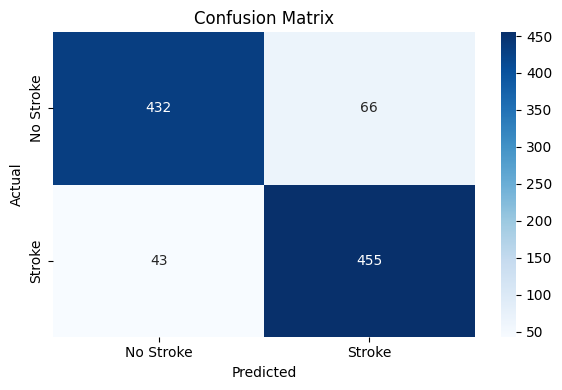

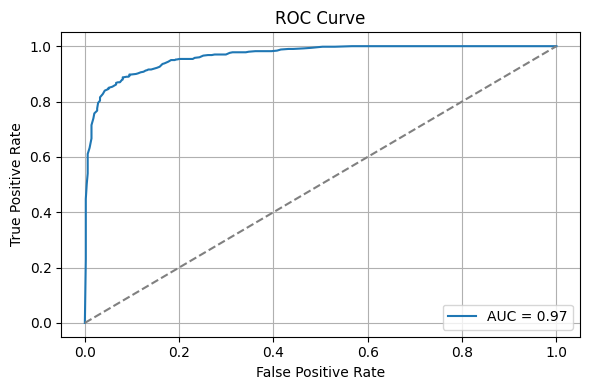

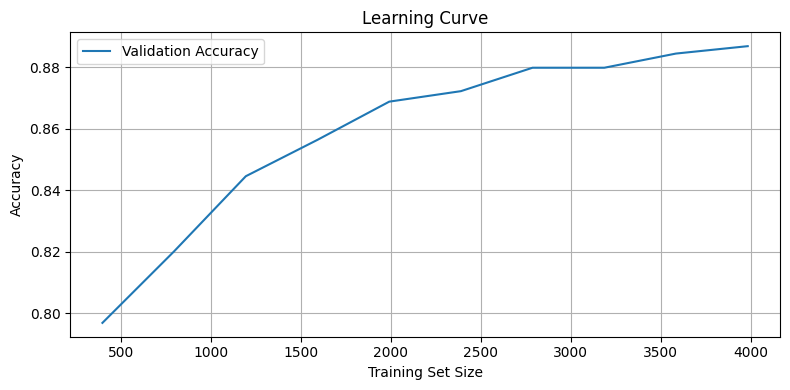


💾 Model saved as rf_model.pkl


In [4]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

# Load preprocessed dataset
df = pd.read_csv('final_stroke_dataset.csv')
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

print(f"\n✅ Accuracy: {acc:.4f}")
from sklearn.metrics import log_loss

loss = log_loss(y_test, clf.predict_proba(X_test))
print(f"\n❌ Log Loss: {loss:.4f}")


print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Plot: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Save model
joblib.dump(clf, 'rf_model.pkl')
print("\n💾 Model saved as rf_model.pkl")


In [6]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Load raw dataset
raw = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Define columns
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
num_cols = ['age', 'avg_glucose_level']

# === STEP 1: Use one LabelEncoder per categorical column ===
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    raw[col] = le.fit_transform(raw[col])
    label_encoders[col] = le

# === STEP 2: StandardScaler per categorical column ===
cat_scalers = {}
for col in cat_cols:
    scaler = StandardScaler()
    raw[col] = scaler.fit_transform(raw[[col]])
    cat_scalers[col] = scaler

# === STEP 3: MinMaxScaler for numeric columns ===
scaler_age = MinMaxScaler()
scaler_glucose = MinMaxScaler()

raw['age'] = scaler_age.fit_transform(raw[['age']])
raw['avg_glucose_level'] = scaler_glucose.fit_transform(raw[['avg_glucose_level']])

# === STEP 4: Save all transformers ===
joblib.dump(label_encoders, 'label_encoders.pkl')        # dict of LabelEncoder per col
joblib.dump(cat_scalers, 'cat_scalers.pkl')              # dict of StandardScaler per col
joblib.dump(scaler_age, 'scaler_age.pkl')                # MinMaxScaler for age
joblib.dump(scaler_glucose, 'scaler_glucose.pkl')        # MinMaxScaler for glucose

print("✅ Saved: label_encoders.pkl, cat_scalers.pkl, scaler_age.pkl, scaler_glucose.pkl")


✅ Saved: label_encoders.pkl, cat_scalers.pkl, scaler_age.pkl, scaler_glucose.pkl
